# Cissa gap filling example - optimise number of components to drop vs the Monte-Carlo component method
We can use CiSSA to fill in gaps of a time-series by making an initial guess for missing values, then iterating through CiSSA fitting until we reach a convergence.

We have the option to drop "n" components, but pycissa will optimise the n for you.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import copy
import os
import warnings
warnings.filterwarnings('ignore')
dir_path = os.path.abspath('')
os.chdir('../../..')
home_path = os.path.abspath('')
os.chdir('./pycissa/processing/cissa')
from cissa import Cissa
os.chdir(home_path)

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

In [3]:
data_with_gaps = copy.deepcopy(data)
data_with_gaps['Electric power consumption in Spain'][100] = np.nan
data_with_gaps['Electric power consumption in Spain'][200] = np.nan
data_with_gaps['Electric power consumption in Spain'][300] = np.nan
data_with_gaps['Electric power consumption in Spain'][400] = np.nan
data_with_gaps['Electric power consumption in Spain'][500] = np.nan
print(data_with_gaps['Electric power consumption in Spain'][499:502])

499    21425.56417
500            NaN
501    19817.63946
Name: Electric power consumption in Spain, dtype: float64


In [4]:
#create the cissa object
cissa_object_n_components = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

## First we gap fill by optimising the number of components to drop.

In [5]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_n_components.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 10, test_repeats=10, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.05], #this means we set missing values to the previous good value multiplied by 1.05 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True, #just so we can see what is going on...
                        #
                        component_selection_method ='add_components_iteratively' #this tells pycissa to optimise the number of componets to drop
                       )

Checking for censored or nan data...
Step 0 of 10
   Dropping 29 of 30
iteration 0.  2953.7443864720917  vs target error:  50
iteration 1.  110.15108801344832  vs target error:  50
iteration 2.  5.576329020997946  vs target error:  50
END iteration: 1, error: nan vs target error: 50
   Dropping 28 of 30
iteration 0.  1702.4147482530175  vs target error:  50
iteration 1.  120.30567182880657  vs target error:  50
iteration 2.  14.153458189709568  vs target error:  50
END iteration: 1, error: 24884.834049722434 vs target error: 50
   Dropping 27 of 30
iteration 0.  1522.4922304166132  vs target error:  50
iteration 1.  141.47458089005033  vs target error:  50
iteration 2.  13.29692294231819  vs target error:  50
END iteration: 1, error: 24089.43339361025 vs target error: 50
   Dropping 26 of 30
iteration 0.  1098.4744156718689  vs target error:  50
iteration 1.  154.89718147756733  vs target error:  50
iteration 2.  23.95783059497066  vs target error:  50
END iteration: 1, error: 24211.80

iteration 0.  2172.5062030797235  vs target error:  50
iteration 1.  69.30808728616466  vs target error:  50
iteration 2.  2.5406996359215555  vs target error:  50
END iteration: 1, error: nan vs target error: 50
   Dropping 28 of 30
iteration 0.  2209.746188651361  vs target error:  50
iteration 1.  235.99265786766045  vs target error:  50
iteration 2.  26.043185046412873  vs target error:  50
END iteration: 1, error: 24857.628653567568 vs target error: 50
   Dropping 27 of 30
iteration 0.  1361.6893931031075  vs target error:  50
iteration 1.  130.07946971228512  vs target error:  50
iteration 2.  13.276060493416253  vs target error:  50
END iteration: 1, error: 24348.46161351988 vs target error: 50
   Dropping 26 of 30
iteration 0.  644.2937906823329  vs target error:  50
iteration 1.  90.80186471806024  vs target error:  50
iteration 2.  213.9281287623831  vs target error:  50
iteration 3.  24.01038988072338  vs target error:  50
END iteration: 1, error: 23378.76736733159 vs target

iteration 10.  53.73806558959734  vs target error:  50
iteration 11.  49.64809947203241  vs target error:  50
END iteration: 1, error: 26689.899939210314 vs target error: 50
   Dropping 6 of 30
iteration 0.  100.54326257392658  vs target error:  50
iteration 1.  74.12049844500899  vs target error:  50
iteration 2.  73.37627872540986  vs target error:  50
iteration 3.  67.77582949826564  vs target error:  50
iteration 4.  62.430342305328054  vs target error:  50
iteration 5.  57.397020537644664  vs target error:  50
iteration 6.  52.699880892505576  vs target error:  50
iteration 7.  48.342761313095934  vs target error:  50
END iteration: 1, error: 28278.556557072974 vs target error: 50
   Dropping 5 of 30
iteration 0.  109.84585762512337  vs target error:  50
iteration 1.  99.45071947464723  vs target error:  50
iteration 2.  90.72890720492572  vs target error:  50
iteration 3.  83.29914358465118  vs target error:  50
iteration 4.  76.87919439365908  vs target error:  50
iteration 5.  

iteration 4.  63.56641389225257  vs target error:  50
iteration 5.  55.65688479212088  vs target error:  50
iteration 6.  48.74596296067034  vs target error:  50
END iteration: 1, error: 26483.959813011454 vs target error: 50
   Dropping 6 of 30
iteration 0.  84.5819353314005  vs target error:  50
iteration 1.  67.67377322713963  vs target error:  50
iteration 2.  54.15597685730398  vs target error:  50
iteration 3.  43.34663847121857  vs target error:  50
END iteration: 1, error: 27075.806121945447 vs target error: 50
   Dropping 5 of 30
iteration 0.  93.80862996980686  vs target error:  50
iteration 1.  84.21877867788777  vs target error:  50
iteration 2.  75.8047231457399  vs target error:  50
iteration 3.  68.24768185820415  vs target error:  50
iteration 4.  61.45656959180167  vs target error:  50
iteration 5.  55.57266673819214  vs target error:  50
iteration 6.  50.80075715238621  vs target error:  50
iteration 7.  46.36046028832402  vs target error:  50
END iteration: 1, error:

iteration 0.  100.43560480498562  vs target error:  50
iteration 1.  88.00742130853197  vs target error:  50
iteration 2.  76.95628813972189  vs target error:  50
iteration 3.  67.16954522144653  vs target error:  50
iteration 4.  58.53772236513612  vs target error:  50
iteration 5.  50.94980058378212  vs target error:  50
iteration 6.  61.42059429695462  vs target error:  50
iteration 7.  53.273968757701596  vs target error:  50
iteration 8.  46.36359333751511  vs target error:  50
END iteration: 1, error: 27123.56529732782 vs target error: 50
   Dropping 5 of 30
iteration 0.  92.2215858035717  vs target error:  50
iteration 1.  75.7929950811043  vs target error:  50
iteration 2.  62.284143072913196  vs target error:  50
iteration 3.  69.0952654969173  vs target error:  50
iteration 4.  60.82037758567503  vs target error:  50
iteration 5.  53.63037854705192  vs target error:  50
iteration 6.  47.36333462188662  vs target error:  50
END iteration: 1, error: 27787.96692367215 vs target 

iteration 5.  66.75147776819915  vs target error:  50
iteration 6.  57.623994075666246  vs target error:  50
iteration 7.  49.592266151791364  vs target error:  50
END iteration: 1, error: 24159.267378601962 vs target error: 50
   Dropping 7 of 30
iteration 0.  135.81938177932517  vs target error:  50
iteration 1.  101.04935224012695  vs target error:  50
iteration 2.  76.5761273292656  vs target error:  50
iteration 3.  58.708364285770074  vs target error:  50
iteration 4.  66.30429402220614  vs target error:  50
iteration 5.  55.511404744862375  vs target error:  50
iteration 6.  49.187831028901485  vs target error:  50
END iteration: 1, error: 24278.951410225218 vs target error: 50
   Dropping 6 of 30
iteration 0.  129.8198290874019  vs target error:  50
iteration 1.  101.6921994517981  vs target error:  50
iteration 2.  82.42012538838827  vs target error:  50
iteration 3.  71.01426988797186  vs target error:  50
iteration 4.  73.52344087396534  vs target error:  50
iteration 5.  64

iteration 1.  56.36360919133992  vs target error:  50
iteration 2.  37.15676411136667  vs target error:  50
END iteration: 1, error: 24916.931908945153 vs target error: 50
   Dropping 10 of 30
iteration 0.  143.43481918266036  vs target error:  50
iteration 1.  135.23882284945972  vs target error:  50
iteration 2.  117.83699347850677  vs target error:  50
iteration 3.  103.41343769334321  vs target error:  50
iteration 4.  91.09550134426672  vs target error:  50
iteration 5.  80.40189573243833  vs target error:  50
iteration 6.  71.0369877214032  vs target error:  50
iteration 7.  101.21310075382871  vs target error:  50
iteration 8.  139.75819247785364  vs target error:  50
iteration 9.  102.46706984472485  vs target error:  50
iteration 10.  84.89497355560161  vs target error:  50
iteration 11.  74.72516692981003  vs target error:  50
iteration 12.  67.51879983478466  vs target error:  50
iteration 13.  61.660768263782984  vs target error:  50
iteration 14.  56.54939328291448  vs tar

iteration 2.  16.413806953814913  vs target error:  50
END iteration: 1, error: 24222.151133692485 vs target error: 50
   Dropping 18 of 30
iteration 0.  101.86850345229414  vs target error:  50
iteration 1.  38.96064469359811  vs target error:  50
END iteration: 1, error: 24418.170620649656 vs target error: 50
   Dropping 17 of 30
iteration 0.  94.36592942807943  vs target error:  50
iteration 1.  53.317202867590424  vs target error:  50
iteration 2.  31.146787429623203  vs target error:  50
END iteration: 1, error: 24345.27869214623 vs target error: 50
   Dropping 16 of 30
iteration 0.  72.78038710904272  vs target error:  50
iteration 1.  35.52422011203058  vs target error:  50
END iteration: 1, error: 24388.568504423365 vs target error: 50
   Dropping 15 of 30
iteration 0.  55.78230164535353  vs target error:  50
iteration 1.  44.10492803231193  vs target error:  50
END iteration: 1, error: 24304.908138048337 vs target error: 50
   Dropping 14 of 30
iteration 0.  81.94770407717908 

iteration 0.  311.55971237753334  vs target error:  50
iteration 1.  67.21029304015502  vs target error:  50
iteration 2.  15.245545538223432  vs target error:  50
END iteration: 1, error: 24048.02919377609 vs target error: 50
   Dropping 22 of 30
iteration 0.  331.97433137982136  vs target error:  50
iteration 1.  82.82198867789955  vs target error:  50
iteration 2.  20.663216104359833  vs target error:  50
END iteration: 1, error: 23880.125014946334 vs target error: 50
   Dropping 21 of 30
iteration 0.  133.55960481853342  vs target error:  50
iteration 1.  37.618380013354226  vs target error:  50
END iteration: 1, error: 24060.948799379137 vs target error: 50
   Dropping 20 of 30
iteration 0.  105.65475594456359  vs target error:  50
iteration 1.  76.29585369551413  vs target error:  50
iteration 2.  20.560980491476393  vs target error:  50
END iteration: 1, error: 24217.837048544734 vs target error: 50
   Dropping 19 of 30
iteration 0.  116.93851182399291  vs target error:  50
iter

iteration 0.  677.2849913809498  vs target error:  50
iteration 1.  70.91302777548295  vs target error:  50
iteration 2.  11.016911497663557  vs target error:  50
END iteration: 1, error: 23857.65210168202 vs target error: 50
   Dropping 24 of 30
iteration 0.  763.056797540369  vs target error:  50
iteration 1.  207.31209096797892  vs target error:  50
iteration 2.  43.02409818109288  vs target error:  50
END iteration: 1, error: 24198.557280091514 vs target error: 50
   Dropping 23 of 30
iteration 0.  309.1323195129225  vs target error:  50
iteration 1.  126.2212045651423  vs target error:  50
iteration 2.  38.46551083374254  vs target error:  50
END iteration: 1, error: 24410.344840855843 vs target error: 50
   Dropping 22 of 30
iteration 0.  239.0338395398689  vs target error:  50
iteration 1.  63.5220662264652  vs target error:  50
iteration 2.  18.867917195881247  vs target error:  50
END iteration: 1, error: 23930.597577646247 vs target error: 50
   Dropping 21 of 30
iteration 0.

iteration 0.  649.4908180101083  vs target error:  50
iteration 1.  124.4181797525099  vs target error:  50
iteration 2.  23.50446962713842  vs target error:  50
END iteration: 1, error: 23813.399481071036 vs target error: 50
   Dropping 24 of 30
iteration 0.  811.7525671128449  vs target error:  50
iteration 1.  160.72982833287642  vs target error:  50
iteration 2.  33.520746447655426  vs target error:  50
END iteration: 1, error: 24089.224423926546 vs target error: 50
   Dropping 23 of 30
iteration 0.  341.2133580026035  vs target error:  50
iteration 1.  172.39241842239278  vs target error:  50
iteration 2.  42.75610075617091  vs target error:  50
END iteration: 1, error: 24382.808205386045 vs target error: 50
   Dropping 22 of 30
iteration 0.  153.21254326947167  vs target error:  50
iteration 1.  45.706722106989844  vs target error:  50
END iteration: 1, error: 24013.000370095924 vs target error: 50
   Dropping 21 of 30
iteration 0.  135.05823743557187  vs target error:  50
iterat

iteration 0.  1241.5409109387174  vs target error:  50
iteration 1.  144.8464396095182  vs target error:  50
iteration 2.  16.898751287776008  vs target error:  50
END iteration: 1, error: 23343.668220131574 vs target error: 50
RUNNING CISSA!
Performing monte-carlo significance analysis...
Grouping components...
Running frequency time analysis...
Analysing trend...
Calculating time-series autocorrelation...
Auto Cissa Complete!


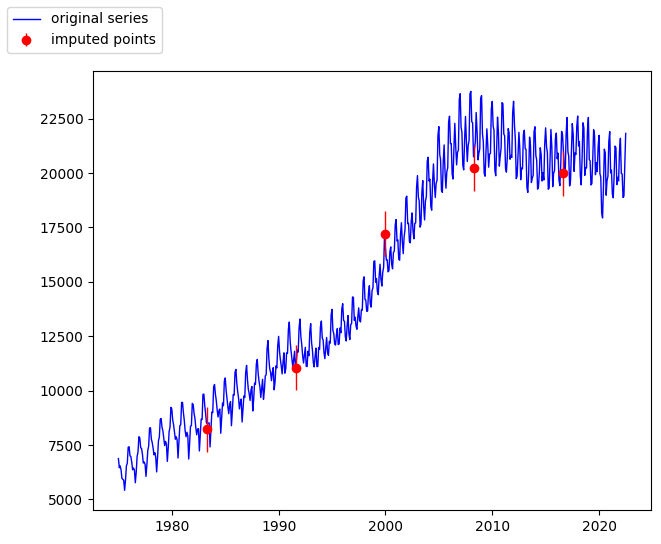

In [6]:
cissa_object_n_components.figures.get('cissa').get('figure_gap_fill')

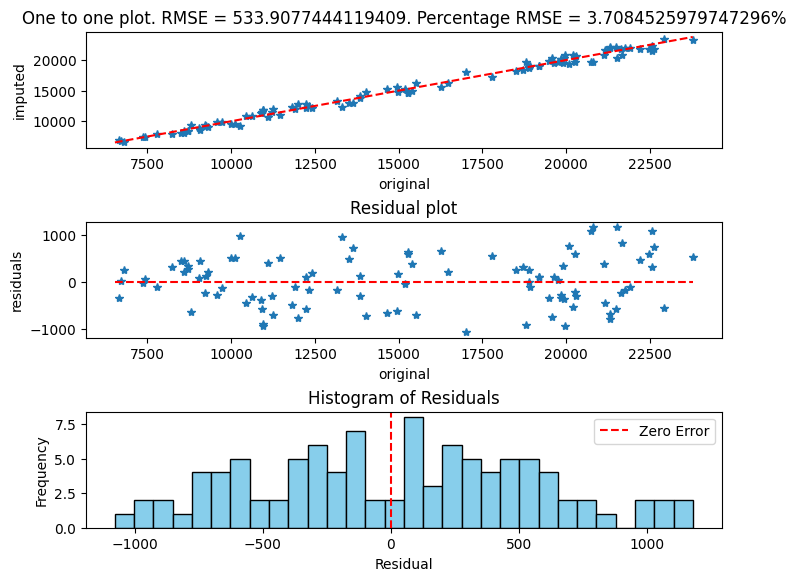

In [7]:
cissa_object_n_components.figures.get('cissa').get('figure_gap_fill_error')

## Now we fill gap using only significant componets found through monte-carlo

In [8]:
cissa_object_monte_carlo = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

In [9]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_monte_carlo.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 10, test_repeats=10, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.05], #this means we set missing values to the previous good value multiplied by 1.05 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True, #just so we can see what is going on...
                        #
                        component_selection_method ='monte_carlo_significant_components' #this tells pycissa to use monte-carlo. NOTE this is the default so don't really need to add this...
                       )

Checking for censored or nan data...
Step 0 of 10
iteration 0.  2490.657660894758  vs target error:  50
iteration 1.  290.57672710436964  vs target error:  50
iteration 2.  41.684090379720146  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 1 of 10
iteration 0.  2490.65766089478  vs target error:  50
iteration 1.  471.3112642795277  vs target error:  50
iteration 2.  101.66030775801482  vs target error:  50
iteration 3.  21.84755774396035  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 2 of 10
iteration 0.  2488.557415615898  vs target error:  50
iteration 1.  291.9664500224899  vs target error:  50
iteration 2.  41.165258912304125  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 3 of 10
iteration 0.  2493.2876890585103  vs target error:  50
iteration 1.  282.93961506387495  vs target error:  50
iteration 2.  33.64121472175975  vs target error:  50
iteration: 0, error: 0.0 vs target error: 50
Step 4 of 10
iteration 0

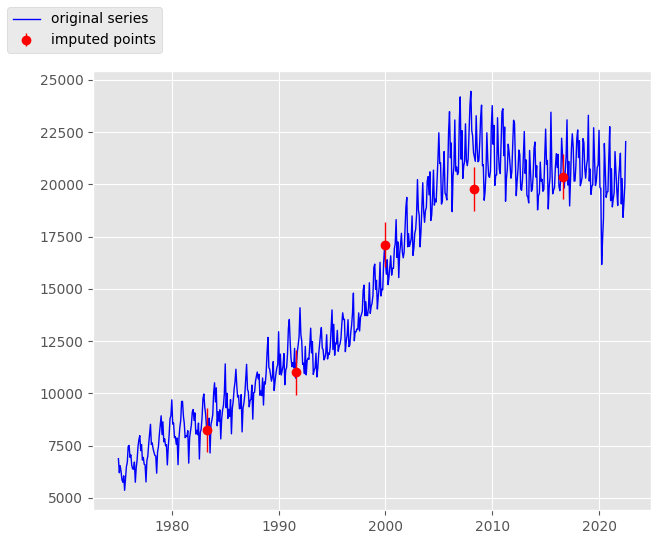

In [10]:
cissa_object_monte_carlo.figures.get('cissa').get('figure_gap_fill')

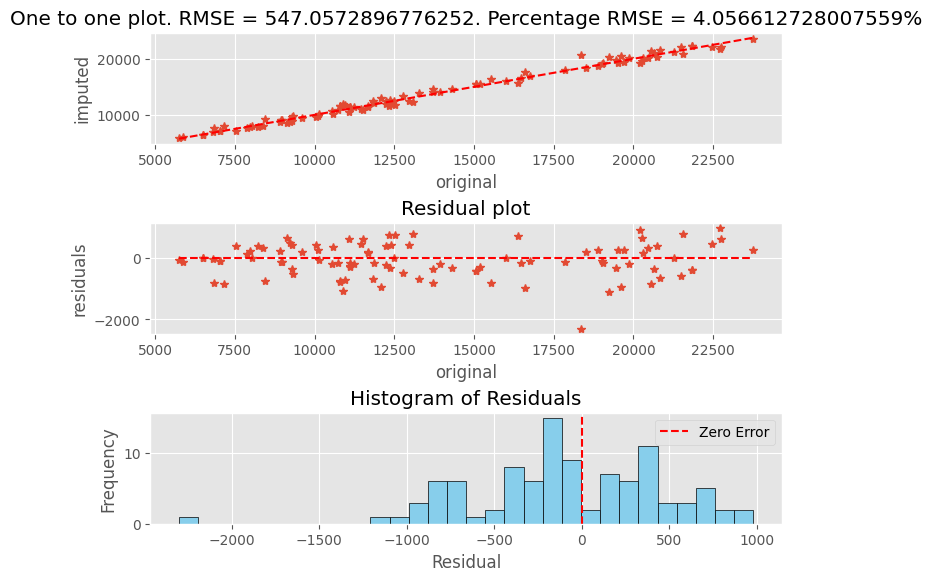

In [11]:
cissa_object_monte_carlo.figures.get('cissa').get('figure_gap_fill_error')

### The RMSE for both methods is similar, but Monte-Carlo is faster.

In [15]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_monte_carlo.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_monte_carlo.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_monte_carlo.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_monte_carlo.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_monte_carlo.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_monte_carlo.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_monte_carlo.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_monte_carlo.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_monte_carlo.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_monte_carlo.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8243.717056369724 percentage error =  5.028489477549792
true:  11537.2 , imputed:  10999.730390874485 percentage error =  4.658579283756158
true:  17861.48079 , imputed:  17104.76176106589 percentage error =  4.236597389829919
true:  20942.10015 , imputed:  19775.020326338657 percentage error =  5.572888178845525
true:  20808.25338 , imputed:  20364.945646668493 percentage error =  2.1304418263072162


In [16]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_n_components.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_n_components.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_n_components.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_n_components.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_n_components.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_n_components.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_n_components.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_n_components.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_n_components.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_n_components.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8218.794037445337 percentage error =  5.315614416196209
true:  11537.2 , imputed:  11057.184738582713 percentage error =  4.160587156478933
true:  17861.48079 , imputed:  17214.34170556016 percentage error =  3.6230987343566214
true:  20942.10015 , imputed:  20219.482134116766 percentage error =  3.450551810503266
true:  20808.25338 , imputed:  19983.81878082556 percentage error =  3.962055748354395
